In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [100]:
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [101]:
housing_data = pd.read_csv('/content/sample_data/Housing.csv')

In [102]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [103]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [104]:
housing_data['furnishingstatus'] = housing_data['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in columns:
  housing_data[i] = housing_data[i].str.strip().str.lower()
  housing_data[i] = housing_data[i].map({'yes': 1, 'no': 0})

In [105]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [106]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


<Axes: xlabel='price', ylabel='Count'>

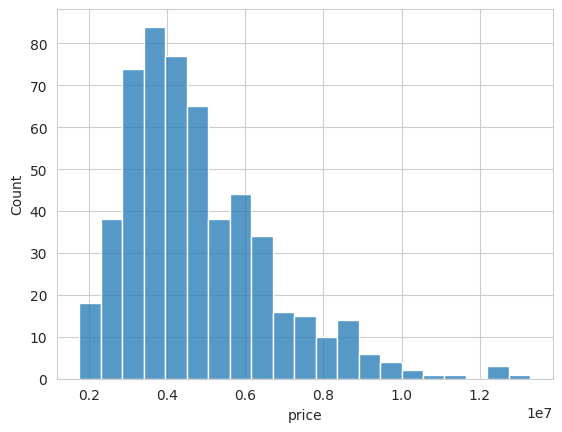

In [107]:
sns.histplot(housing_data['price'])

<Axes: xlabel='price', ylabel='area'>

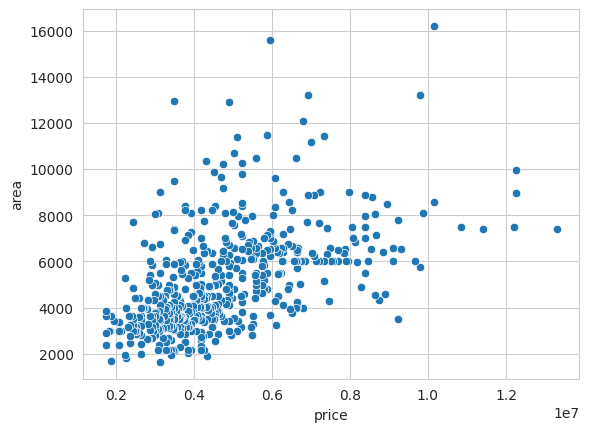

In [108]:
sns.scatterplot(x='price', y='area', data=housing_data)

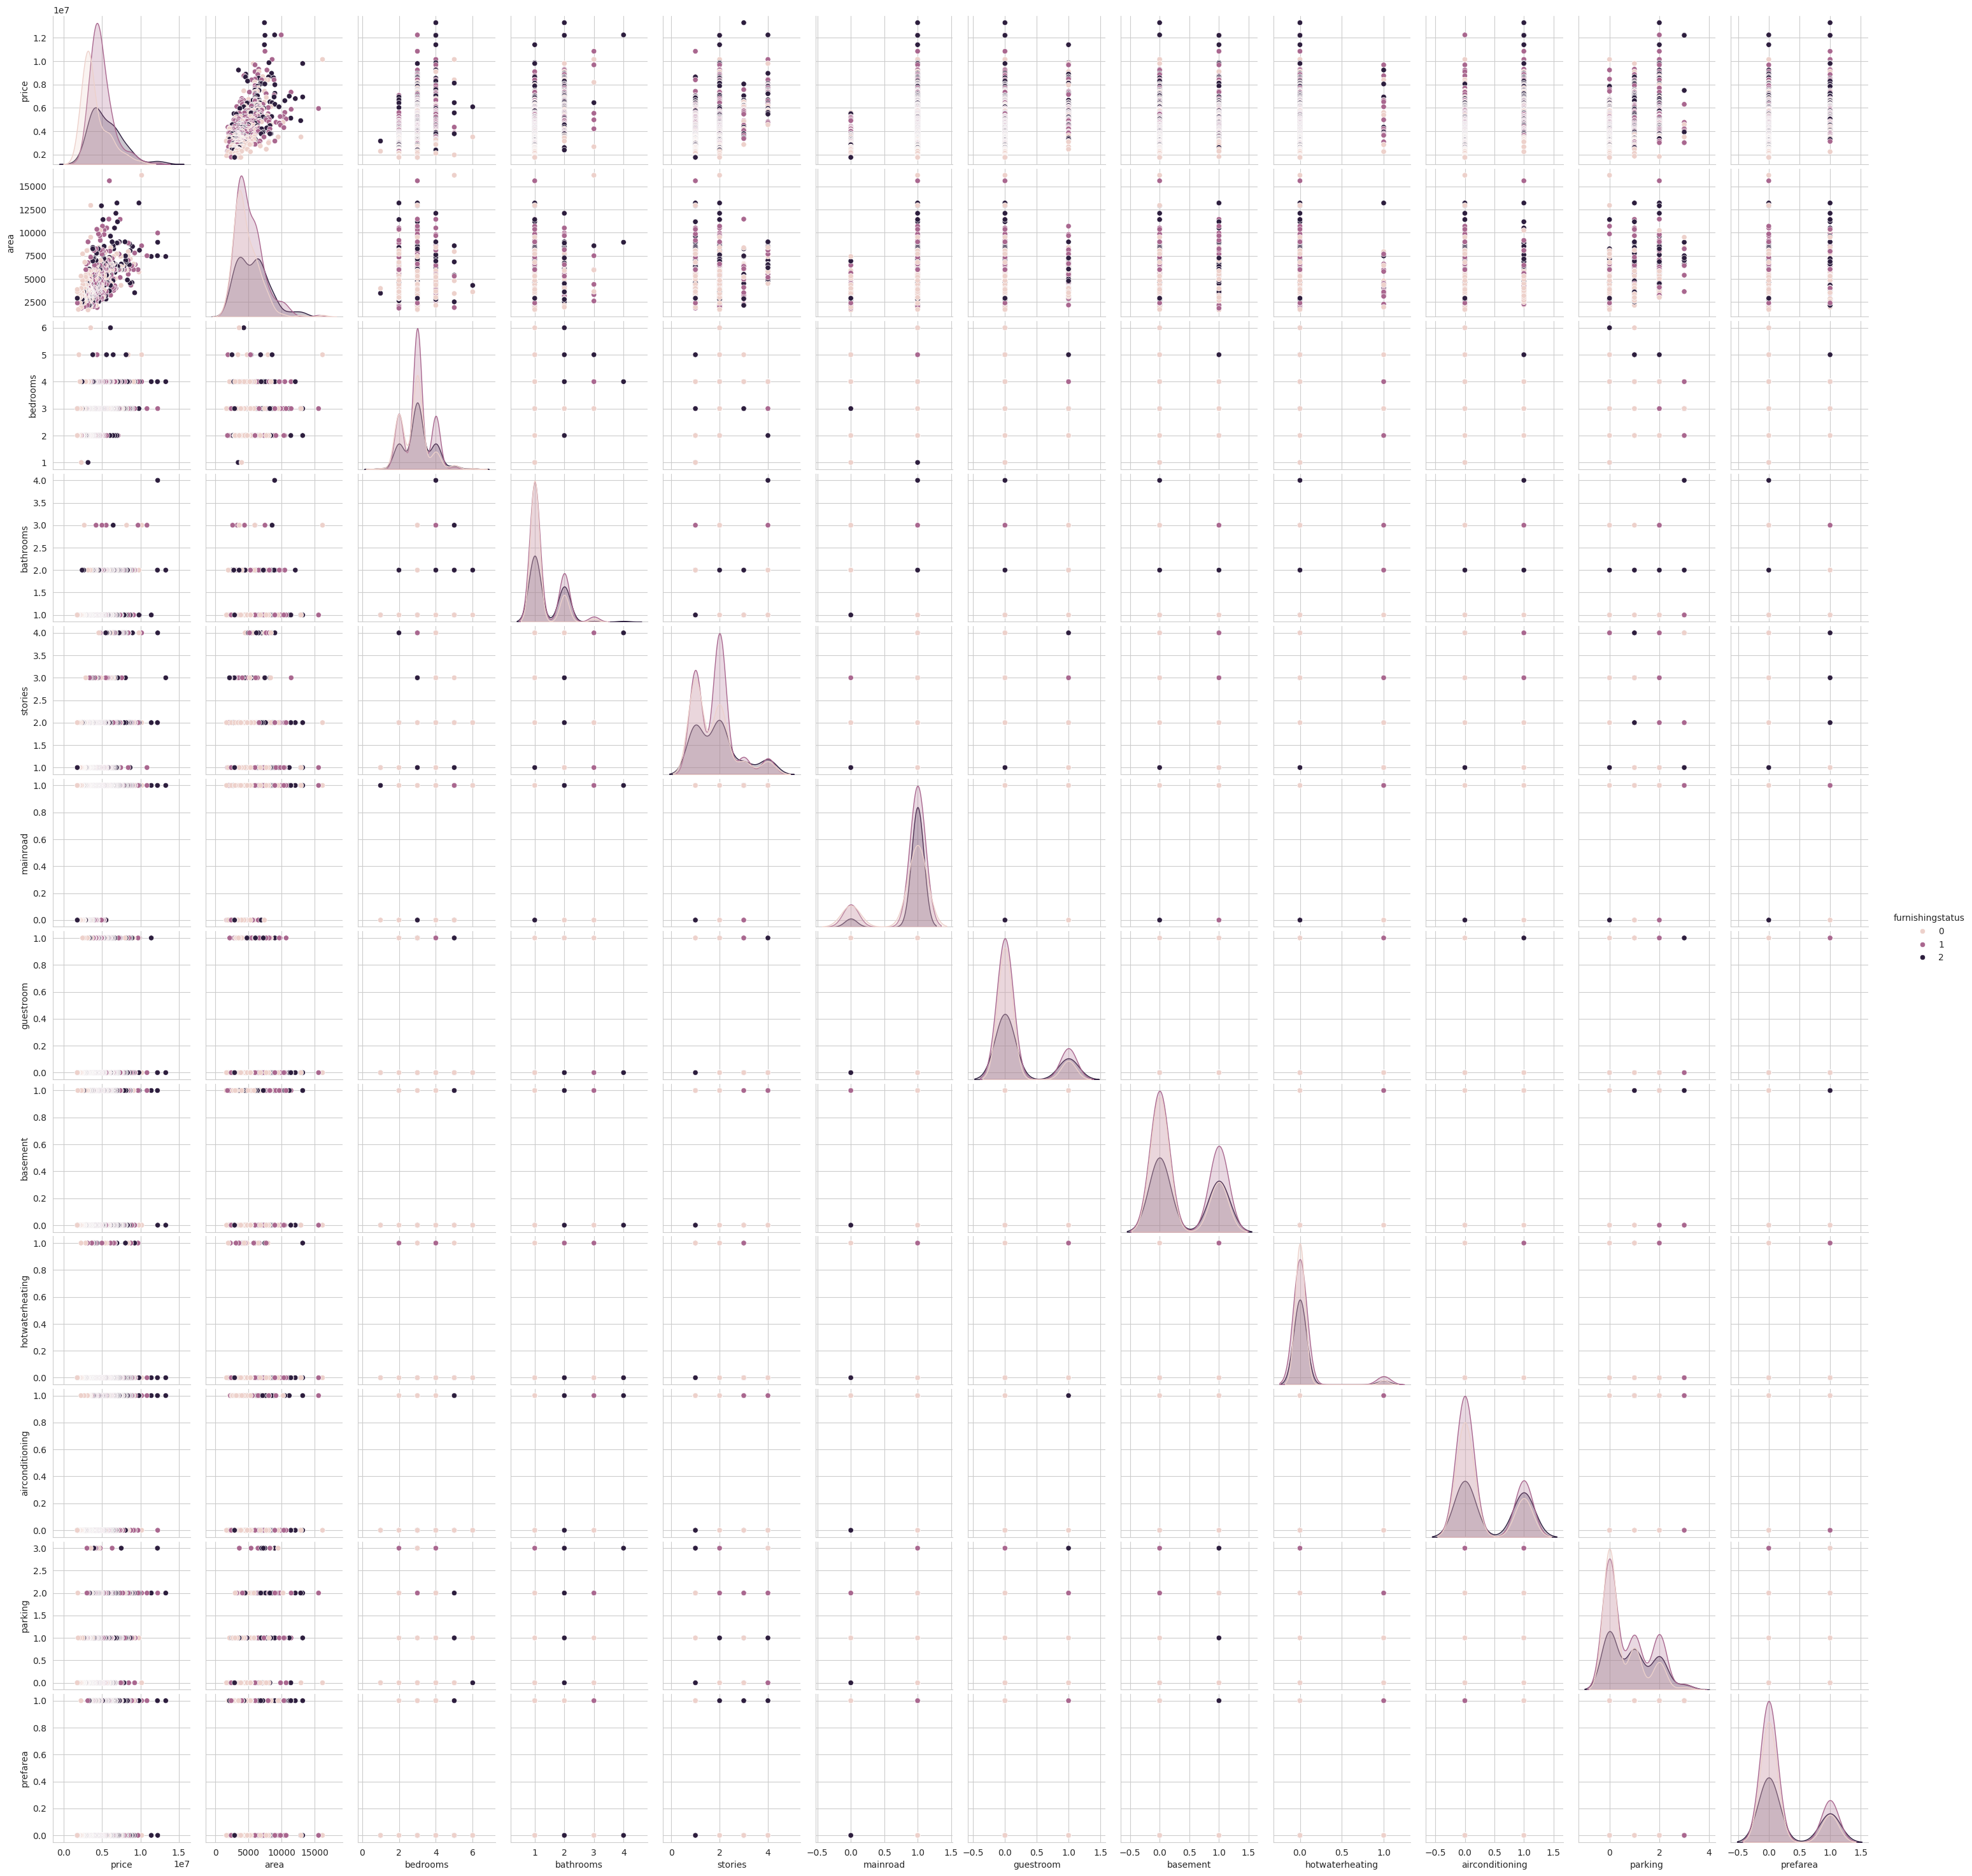

In [109]:
sns.pairplot(housing_data, hue='furnishingstatus')

In [110]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [111]:
housing_data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


<Axes: >

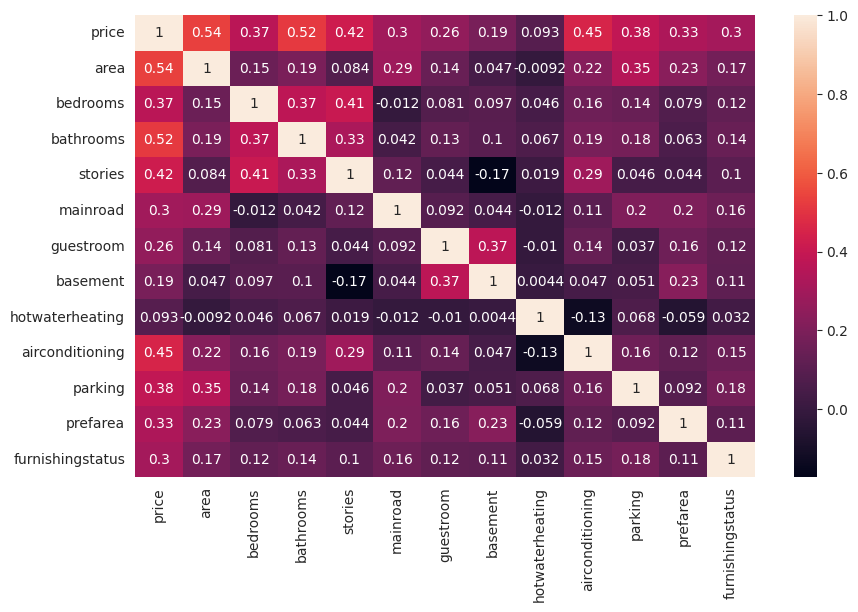

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(housing_data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']].corr(), annot=True)

In [113]:
feature = housing_data.columns[1:]

In [114]:
X = housing_data[feature]
y = housing_data['price']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(X_train, y_train)

LinearRegression()

In [120]:
print(lr.intercept_)

-406579.1763486555


In [121]:
lr.coef_

array([2.66028776e+02, 1.06819922e+05, 9.50400838e+05, 4.62675653e+05,
       4.08149492e+05, 1.07728026e+05, 4.06933825e+05, 1.04531059e+06,
       8.20713183e+05, 2.93021088e+05, 7.03534010e+05, 2.31445926e+05])

In [122]:
cdf = pd.DataFrame(lr.coef_, columns=['Coeff'])

cdf

,Coeff
0,2.660288e+02
1,1.068199e+05
2,9.504008e+05
3,4.626757e+05
4,4.081495e+05
5,1.077280e+05
6,4.069338e+05
7,1.045311e+06
8,8.207132e+05
9,2.930211e+05


In [123]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

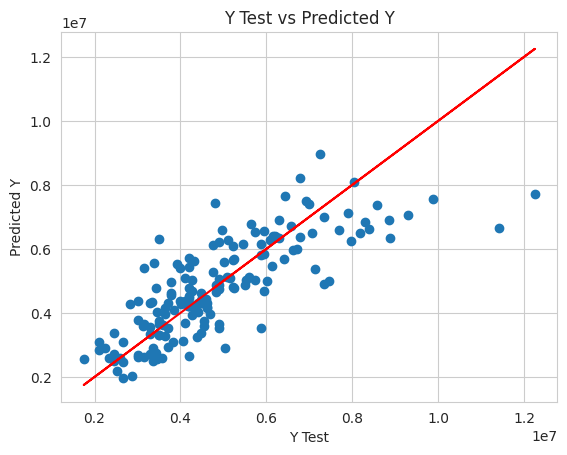

In [124]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='red')
plt.title('Y Test vs Predicted Y')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [125]:
from sklearn import metrics

In [126]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [127]:
print(f'Mean square error: {mse}')
print(f'Mean absolute error: {mae}')
print(f'Root mean square error: {rmse}')

Mean square error: 1242507083253.1592
Mean absolute error: 808831.3046101702
Root mean square error: 1114678.0177491433


In [129]:
lr.score(X_test, y_test)

0.6192266539196798